In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# 1. EDA

In [2]:
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# data.sentiment.value_counts()

In [4]:
# data/label distribution
Counter(data.sentiment)

Counter({'positive': 25000, 'negative': 25000})

In [5]:
list(map(len, data.review))

[1761,
 998,
 926,
 748,
 1317,
 656,
 726,
 934,
 681,
 176,
 578,
 937,
 2227,
 662,
 275,
 830,
 720,
 1322,
 639,
 741,
 1813,
 1020,
 346,
 1767,
 808,
 680,
 3149,
 836,
 665,
 3791,
 2568,
 2250,
 602,
 4009,
 1300,
 2035,
 494,
 1761,
 604,
 1485,
 678,
 1304,
 937,
 1625,
 906,
 1273,
 434,
 851,
 3975,
 598,
 2411,
 3371,
 956,
 429,
 1220,
 1226,
 1176,
 916,
 3042,
 2551,
 922,
 895,
 510,
 267,
 1052,
 1716,
 1994,
 720,
 1143,
 1702,
 1249,
 1560,
 1408,
 972,
 1614,
 793,
 1699,
 3375,
 825,
 1655,
 897,
 816,
 1424,
 2408,
 402,
 767,
 1671,
 724,
 1084,
 2041,
 964,
 1044,
 2253,
 1076,
 847,
 1565,
 1086,
 758,
 993,
 2866,
 793,
 4184,
 766,
 1958,
 1029,
 1229,
 630,
 1642,
 1038,
 636,
 814,
 1136,
 226,
 535,
 1559,
 762,
 2073,
 465,
 512,
 1524,
 626,
 951,
 1261,
 807,
 771,
 684,
 2351,
 754,
 1048,
 682,
 1144,
 2457,
 905,
 723,
 1056,
 2291,
 623,
 1426,
 1659,
 1489,
 2267,
 1730,
 3118,
 454,
 1507,
 1626,
 1203,
 1824,
 766,
 1683,
 1011,
 998,
 1127,
 1

(array([3.4883e+04, 1.0845e+04, 2.9210e+03, 1.0330e+03, 2.9300e+02,
        1.4000e+01, 4.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([   32. ,  1399.2,  2766.4,  4133.6,  5500.8,  6868. ,  8235.2,
         9602.4, 10969.6, 12336.8, 13704. ]),
 <a list of 10 Patch objects>)

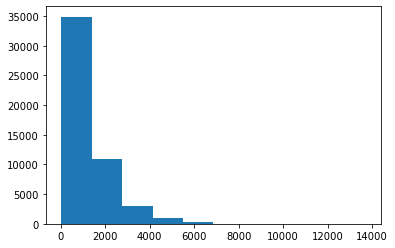

In [6]:
# review lengths
plt.hist(list(map(len, data.review)))

# 2. Data Preprocessing
- remove stop words, punctuation, capital letters
- Tokenize
- Stemming
- Lemmatizing

In [7]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [8]:
en_stop = set(stopwords.words('english'))

In [9]:
p_stemmer = PorterStemmer()
def preprocess(rws):
    # Special normalization
    ## getting rid of < br >
    res = re.sub(r'<.*?>', '', rws)
    # Lower case
    res = res.lower()
    # Tokenize
    res = word_tokenize(res)
    # Remove non-alphabetical (ignoring numbers, cause sometimes they could be misleading)
    res = [w for w in res if w.isalpha()]
    # Stop words
    res = [w for w in res if w not in en_stop]
    # Stemming if doing word-wise
    res = [p_stemmer.stem(w) for w in res]
    # Didn't do Lemmatize here, since Stemming is good enough
    return ' '.join(res)

In [10]:
rws = data.review.values

In [11]:
# preprocessing
rws_processed = []
n = len(rws)
for i in range(n):
    rws_processed.append(preprocess(rws[i]))
    print('Pre-processing {:.2f}%'.format((i+1)/n*100), end='\r')

In [12]:
rws_processed = np.array(rws_processed)

In [13]:
lbs = data.sentiment == 'positive'

In [14]:
lbs

0         True
1         True
2         True
3        False
4         True
         ...  
49995     True
49996    False
49997    False
49998    False
49999    False
Name: sentiment, Length: 50000, dtype: bool

# 3. Vectorization

### TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
# applying TF-IDF
# 1. limit vocab = 2000, from most frequent
# 2. removing stop_words
# 3. removing numbers
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(rws)
# print(vectorizer.get_feature_names())
print(X.shape)

(50000, 2000)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, lbs, random_state=0)

In [ ]:
# X_train= X_train.toarray()
# X_test = X_test.toarray()

### LR on TF-IDF

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Validation Acc: % .2f' % (np.mean(y_pred == y_test)*100))

Validation Acc:  87.82


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.87      0.88      6291
        True       0.87      0.89      0.88      6209

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500



### SVM on TF-IDF

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA()

In [22]:
X_pca = pca.fit_transform(X.toarray())

In [23]:
pca.explained_variance_ratio_.cumsum()[1000]
# I don't think PCA works great here, since we only get 78% variation explained
# even if we include 1000 principle components.

0.7790538708611335

In [ ]:
# SVC blows the memory up for huge number of training examples (quadratically)
# svm = SVC()
# svm.fit(X_train, y_train)
# y_pred = lr.predict(X_test)

In [24]:
# Linear SVM
svm_l = LinearSVC()
svm_l.fit(X_train, y_train)
y_pred = svm_l.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.87      0.88      6291
        True       0.87      0.88      0.88      6209

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500



### NNs on TF-IDF vectors

In [32]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras import callbacks

In [27]:
model = Sequential()
model.add(layers.Dense(200, input_dim=2000, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [33]:
callbacks = [callbacks.EarlyStopping(monitor='val_loss', patience=2)]
history = model.fit(X_train.toarray(), y_train, epochs=30, batch_size=64, validation_data=(X_test.toarray(), y_test),callbacks=callbacks)

Epoch 1/30
586/586 [==============================] - 16s 9ms/step - loss: 0.6927 - accuracy: 0.5277 - val_loss: 0.6921 - val_accuracy: 0.5339
Epoch 2/30
586/586 [==============================] - 4s 7ms/step - loss: 0.6911 - accuracy: 0.5837 - val_loss: 0.6899 - val_accuracy: 0.6334
Epoch 3/30
586/586 [==============================] - 4s 6ms/step - loss: 0.6876 - accuracy: 0.6501 - val_loss: 0.6849 - val_accuracy: 0.6764
Epoch 4/30
586/586 [==============================] - 4s 6ms/step - loss: 0.6787 - accuracy: 0.6993 - val_loss: 0.6709 - val_accuracy: 0.7148
Epoch 5/30
586/586 [==============================] - 3s 6ms/step - loss: 0.6502 - accuracy: 0.7436 - val_loss: 0.6205 - val_accuracy: 0.7643
Epoch 6/30
586/586 [==============================] - 4s 6ms/step - loss: 0.5452 - accuracy: 0.7927 - val_loss: 0.4583 - val_accuracy: 0.8176
Epoch 7/30
586/586 [==============================] - 4s 6ms/step - loss: 0.3906 - accuracy: 0.8351 - val_loss: 0.3499 - val_accuracy: 0.8523
Epoch

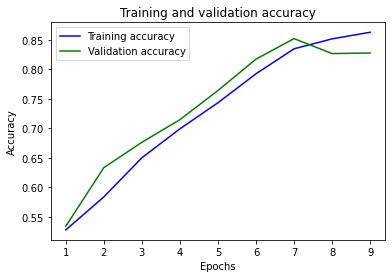

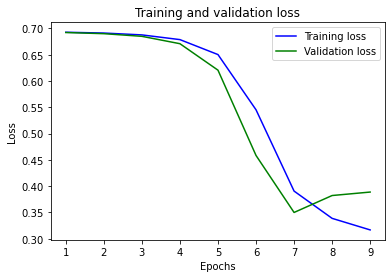

In [35]:
# Let's plot training and validation accuracy as well as loss.
def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(accuracy) + 1)

    # Plot accuracy
    plt.figure(1)
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.figure(2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


plot_history(history)


In [36]:
y_pred = model.predict(X_test.toarray()) > 0.5

In [37]:
# the results is similar to LR and LinearSVC
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.76      0.96      0.85      6291
        True       0.94      0.70      0.80      6209

    accuracy                           0.83     12500
   macro avg       0.85      0.83      0.82     12500
weighted avg       0.85      0.83      0.82     12500



In [38]:
print(accuracy_score(y_test, y_pred))

0.82792
